In [14]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
import numpy as np

In [15]:
id_information_S1 = pickle.load(open('id_information_S1_file', 'rb'))
id_information_S2 = pickle.load(open('id_information_S2_file', 'rb'))
print(id_information_S1)
print('\n', id_information_S2)

   Participant ID                Emotional sequence Sequence  \
0            C001  [Baseline, Fear, Happy, Neutral]      FHN   
1            C002  [Baseline, Fear, Neutral, Happy]      FNH   
2            C003  [Baseline, Fear, Neutral, Happy]      FNH   
3            C004  [Baseline, Happy, Fear, Neutral]      HFN   
4            C005  [Baseline, Happy, Neutral, Fear]      HNF   
5            C006  [Baseline, Happy, Neutral, Fear]      HNF   
6            C007  [Baseline, Happy, Fear, Neutral]      HFN   
7            C008  [Baseline, Happy, Neutral, Fear]      HNF   
8            C009  [Baseline, Happy, Fear, Neutral]      HFN   
9            C010  [Baseline, Fear, Happy, Neutral]      FHN   
10           C011  [Baseline, Neutral, Fear, Happy]      NFH   
11           C012  [Baseline, Neutral, Happy, Fear]      NHF   
12           C013  [Baseline, Neutral, Happy, Fear]      NHF   
13           C014  [Baseline, Fear, Happy, Neutral]      FHN   
14           C015  [Baseline, Neutral, H

In [16]:
filepath_feat_S1='conditions_features_S1.xlsx'
filepath_feat_S2='conditions_features_S2.xlsx'
happy_S1 = pd.read_excel(filepath_feat_S1,sheet_name='Happy_S1',  usecols=lambda x: 'Unnamed' not in x)
happy_S2 = pd.read_excel(filepath_feat_S2,sheet_name='Happy_S2',  usecols=lambda x: 'Unnamed' not in x)
print(happy_S1.head())
print('\n',happy_S1.head())

   EMG_MF_Activations_N  EMG_MF_Duration_Mean  EMG_MF_Duration_Std  \
0                   427              0.088222             0.107594   
1                   351              0.123026             0.124615   
2                   372              0.092306             0.105544   
3                   487              0.077552             0.028295   
4                   619              0.084868             0.046233   

   EMG_MF_Duration_Var  EMG_MF_Duration_Skew  EMG_MF_Duration_Kurt  \
0             0.011576              0.535973            290.888807   
1             0.015529              1.011733             22.287138   
2             0.011140              0.577192            161.267849   
3             0.000801              0.906777              6.020106   
4             0.002137              0.964742             16.148914   

   EMG_MF_MaxPeakAct_Mean  EMG_MF_MaxPeakAct_Std  EMG_MF_MaxPeakAct_Var  \
0             8501.726763           34171.435861           1.167687e+09   
1       

True

 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]

     EMG_MF_Activations_N  EMG_MF_Duration_Mean  EMG_MF_Duration_Std  \
0                    427              0.088222             0.107594   
1                    351              0.123026             0.124615   
2                    372              0.092306             0.105544   
3                    487              0.077552             0.028295   
4                    619              0.084868             0.046233   
5                    216              0.105958             0.149298   
6                    227              0.141498             0.271256   
7                    200              0.303660             0.648147   
8                    279              0.112731             0.258254   
9                    445              0.145018             0.286488   
10                   185        

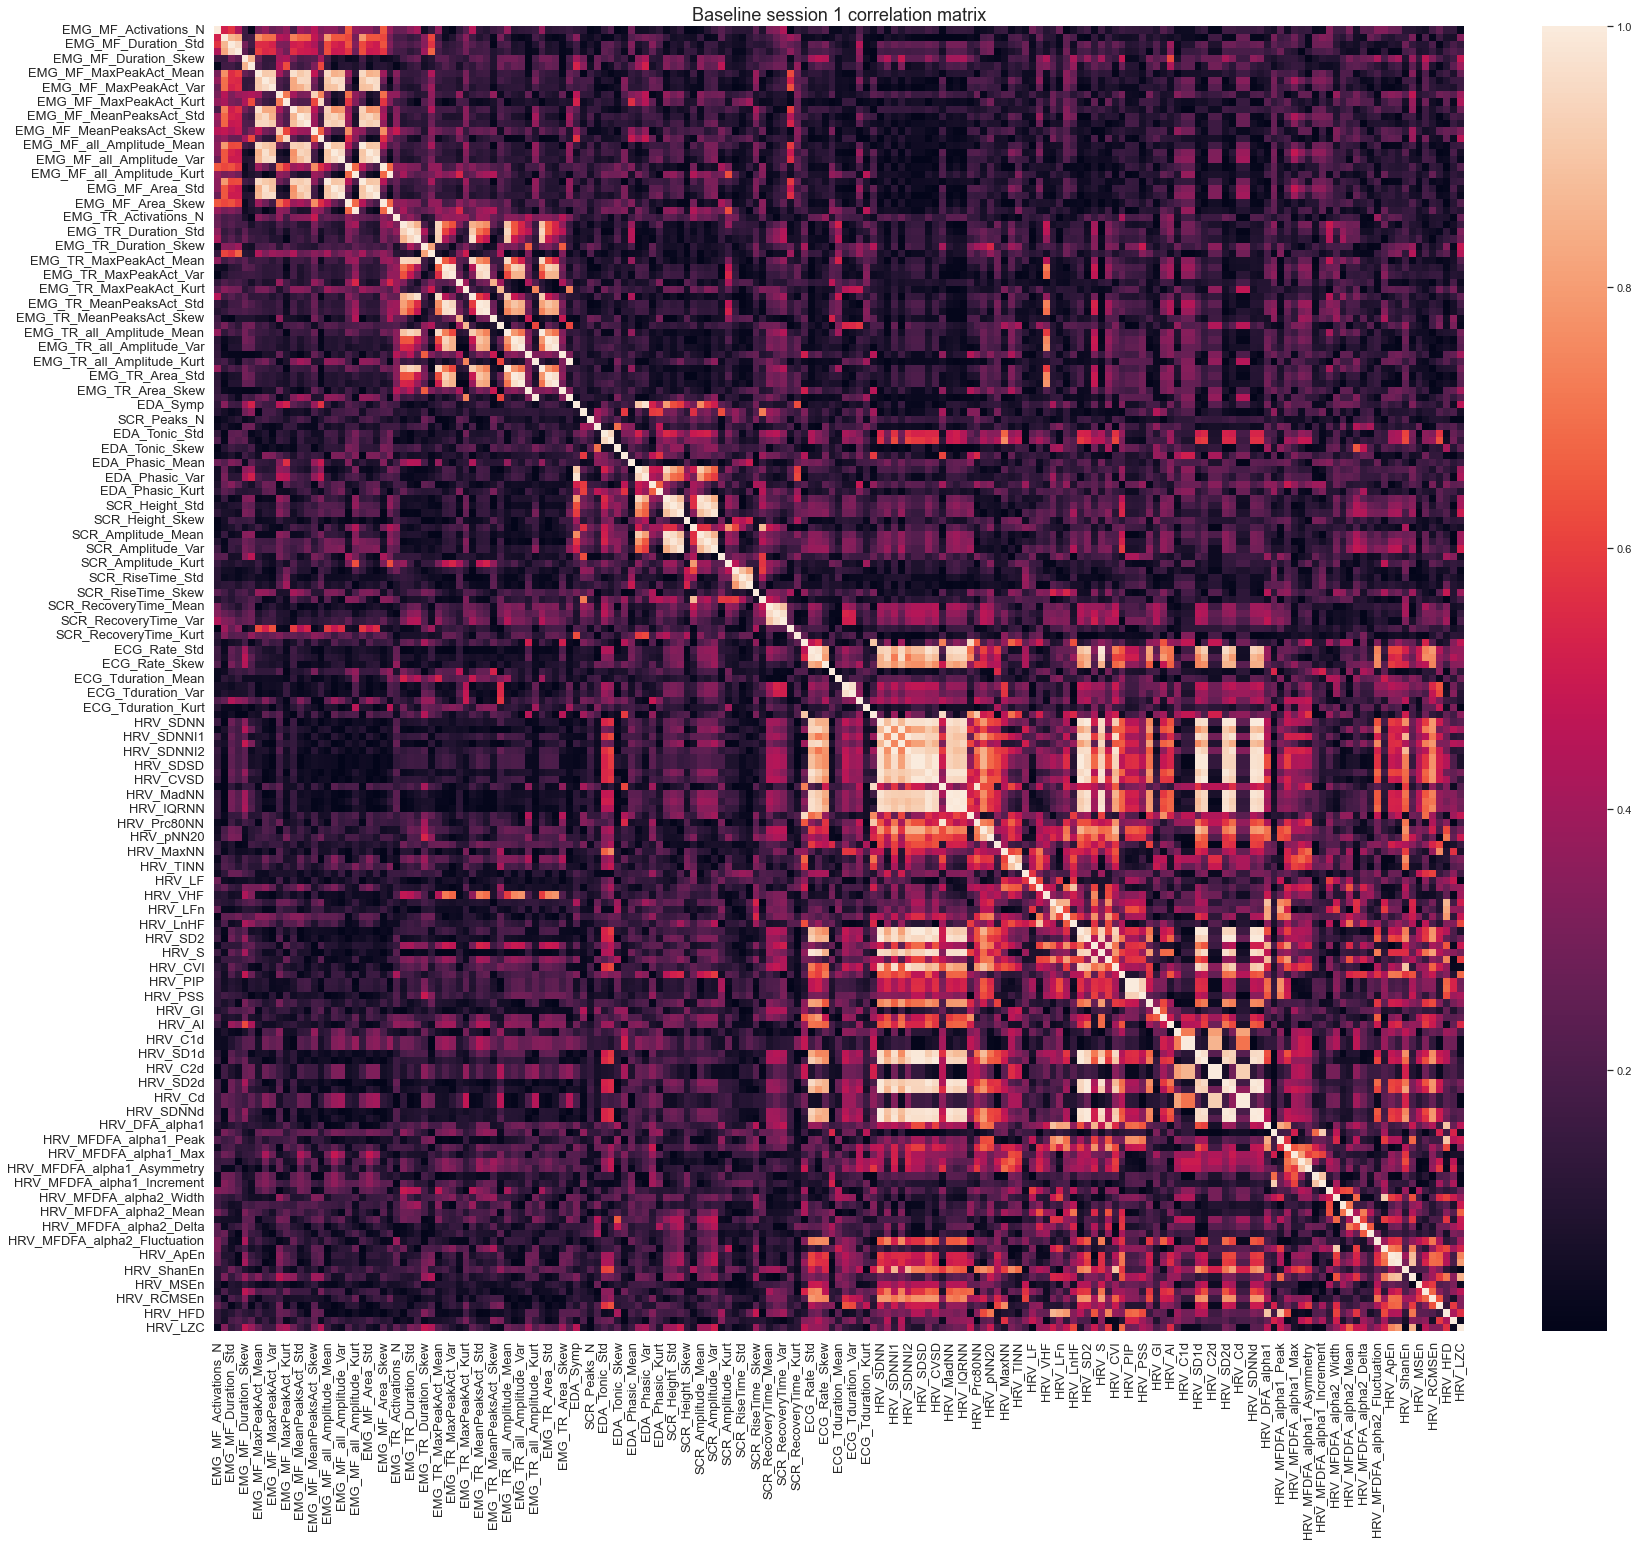

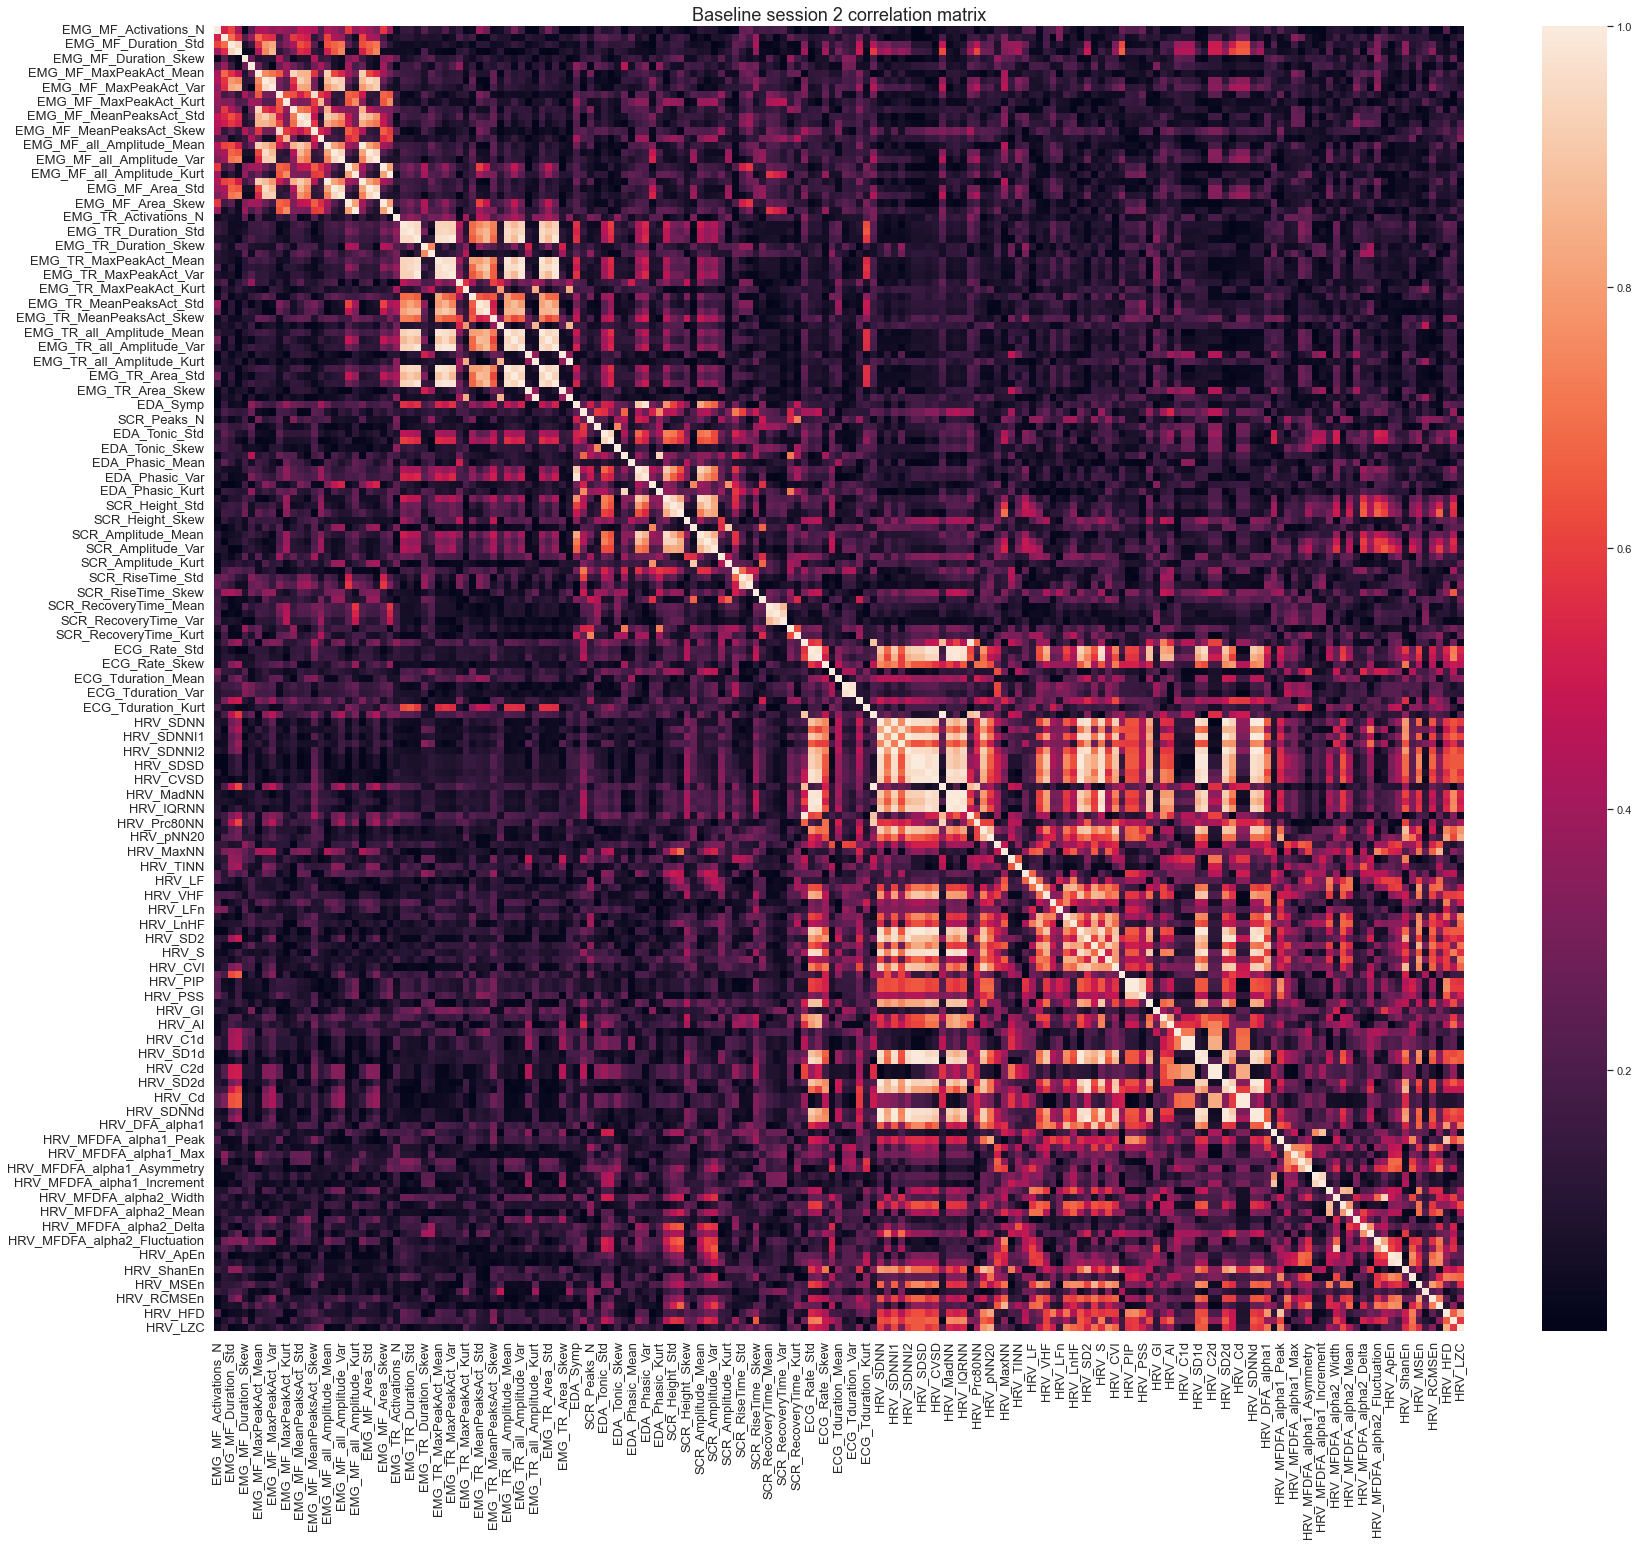

In [17]:
# Tenho de fazer uma análise de remoção de NaN das features da baseline de cada sessão: 
print(happy_S1.isnull().values.any()) # Verifica se existe algum valor nulo. True -> Existe.
print('\n',happy_S1.isnull().values.any(axis=1)) # Verifica em que linhas existem valores nulos ou não\n",
incomplete_lines_S1 = happy_S1[happy_S1.isnull().values.any(axis=1)]
print('\n',happy_S1[happy_S1.isnull().values.any(axis=1)]) # Fornece as linhas que contêm NaN values\n",
print('\n',incomplete_lines_S1.shape) #(29, 184) # Todas as linhas têm NaN porque há colunas que tem todos os falores NaN\n",
print('\n',happy_S1.isnull().values.any(axis=0)) # Verifica em que colunas existem valores nulos ou não\n",
print('\n',happy_S1.columns[happy_S1.isna().any()].tolist()) # Fornece uma lista com as colunas que têm NaN values\n",
# Colunas que têm valores NaN:  ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF'],
print(happy_S1[ ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF']]),
print('\n',happy_S1['HRV_SDANN5'].value_counts().sum()) #0
print('\n',happy_S1['HRV_SDNNI5'].value_counts().sum()) #0
print('\n',happy_S1['HRV_ULF'].value_counts().sum()) #0

print(happy_S2.isnull().values.any()) # Verifica se existe algum valor nulo. True -> Existe.
print('\n',happy_S2.isnull().values.any(axis=1)) # Verifica em que linhas existem valores nulos ou não\n",
incomplete_lines_S2 = happy_S2[happy_S2.isnull().values.any(axis=1)]
print('\n',happy_S2[happy_S2.isnull().values.any(axis=1)]) # Fornece as linhas que contêm NaN values\n",
print('\n',incomplete_lines_S2.shape) #(29, 184) # Todas as linhas têm NaN porque há colunas que tem todos os falores NaN\n",
print('\n',happy_S2.isnull().values.any(axis=0)) # Verifica em que colunas existem valores nulos ou não\n",
print('\n', happy_S2.columns[happy_S2.isna().any()].tolist()) # Fornece uma lista com as colunas que têm NaN values\n",
# Colunas que têm valores NaN:   ['HRV_ULF'],'HRV_SDANN5', 'HRV_SDNNI5',
print(happy_S2[  ['HRV_ULF']]),
print('\n',happy_S2['HRV_ULF'].value_counts().sum()) #0


# Dado os valores NaN obtidos nas ditas colunas a melhor forma é remover estas features:,
happy_S1 = happy_S1.drop( ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF'],axis=1)
print(happy_S1.shape) 
happy_S2 = happy_S2.drop( ['HRV_SDANN5', 'HRV_SDNNI5','HRV_ULF'],axis=1)
print(happy_S2.shape) 

cor_b_S1 = abs(happy_S1.corr())
cor_b_S2 = abs(happy_S2.corr())

sns.set(rc={'figure.figsize':(28,24)})
b_S1=sns.heatmap(cor_b_S1)
b_S1.set_title('Happy session 1 correlation matrix',fontsize=18)
b_S1.tick_params(labelsize=13)
plt.show()

sns.set(rc={'figure.figsize':(28,24)})
b_S2=sns.heatmap(cor_b_S2)
b_S2.set_title('Happy session 2 correlation matrix',fontsize=18)
b_S2.tick_params(labelsize=13)
plt.show()

In [18]:
cor_b_S1.values
corr_mean_S1 = np.mean(cor_b_S1, axis=0)
print(corr_mean_S1)

cor_b_S2.values
corr_mean_S2 = np.mean(cor_b_S2, axis=0)
print(corr_mean_S2)

EMG_MF_Activations_N    0.173353
EMG_MF_Duration_Mean    0.189508
EMG_MF_Duration_Std     0.216001
EMG_MF_Duration_Var     0.194335
EMG_MF_Duration_Skew    0.222553
                          ...   
HRV_RCMSEn              0.285097
HRV_CD                  0.236452
HRV_HFD                 0.241926
HRV_KFD                 0.199108
HRV_LZC                 0.254248
Length: 181, dtype: float64
EMG_MF_Activations_N    0.145984
EMG_MF_Duration_Mean    0.156310
EMG_MF_Duration_Std     0.201214
EMG_MF_Duration_Var     0.200936
EMG_MF_Duration_Skew    0.129283
                          ...   
HRV_RCMSEn              0.280366
HRV_CD                  0.227870
HRV_HFD                 0.274481
HRV_KFD                 0.303356
HRV_LZC                 0.249986
Length: 181, dtype: float64


EMG_MF_Activations_N    EMG_MF_all_Amplitude_Skew
EMG_MF_Duration_Mean          EMG_MF_Duration_Std
EMG_MF_Duration_Std           EMG_MF_Duration_Var
EMG_MF_Duration_Var           EMG_MF_Duration_Std
EMG_MF_Duration_Skew         EMG_MF_Duration_Kurt
                                  ...            
HRV_RCMSEn                                  HRV_S
HRV_CD                                  HRV_MaxNN
HRV_HFD                     HRV_MFDFA_alpha1_Peak
HRV_KFD                                    HRV_CD
HRV_LZC                               HRV_FuzzyEn
Length: 181, dtype: object

 EMG_MF_Duration_Std

 0.5223316385905731


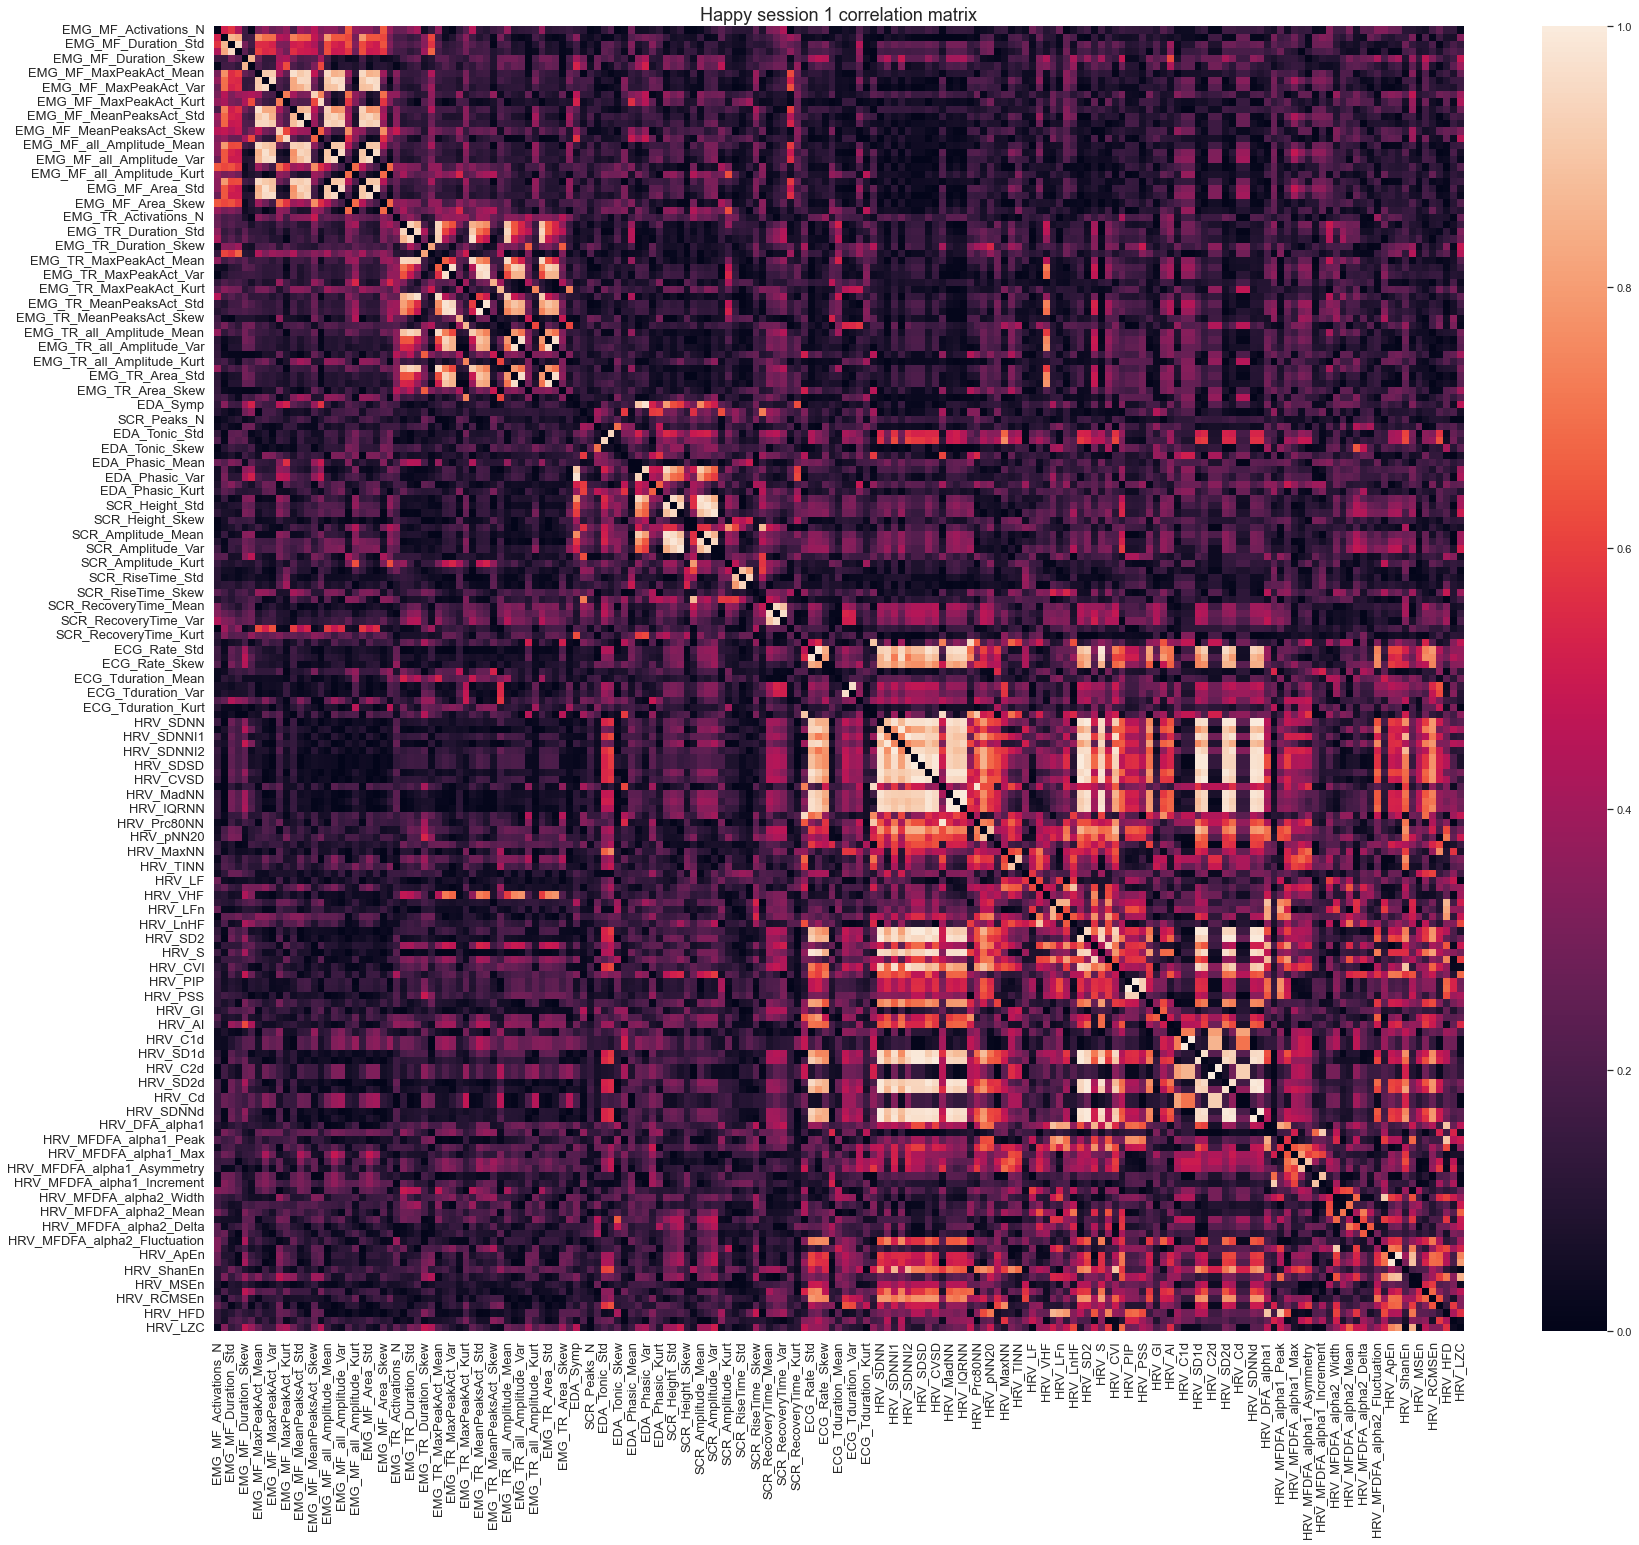

EMG_MF_Activations_N         EMG_MF_Duration_Std
EMG_MF_Duration_Mean         EMG_MF_Duration_Std
EMG_MF_Duration_Std          EMG_MF_Duration_Var
EMG_MF_Duration_Var          EMG_MF_Duration_Std
EMG_MF_Duration_Skew    EMG_MF_MeanPeaksAct_Skew
                                  ...           
HRV_RCMSEn                              HRV_MSEn
HRV_CD                                 HRV_MaxNN
HRV_HFD                    HRV_MFDFA_alpha1_Peak
HRV_KFD                                HRV_MadNN
HRV_LZC                                HRV_pNN20
Length: 181, dtype: object

 EMG_MF_Duration_Std

 0.5259755086433728


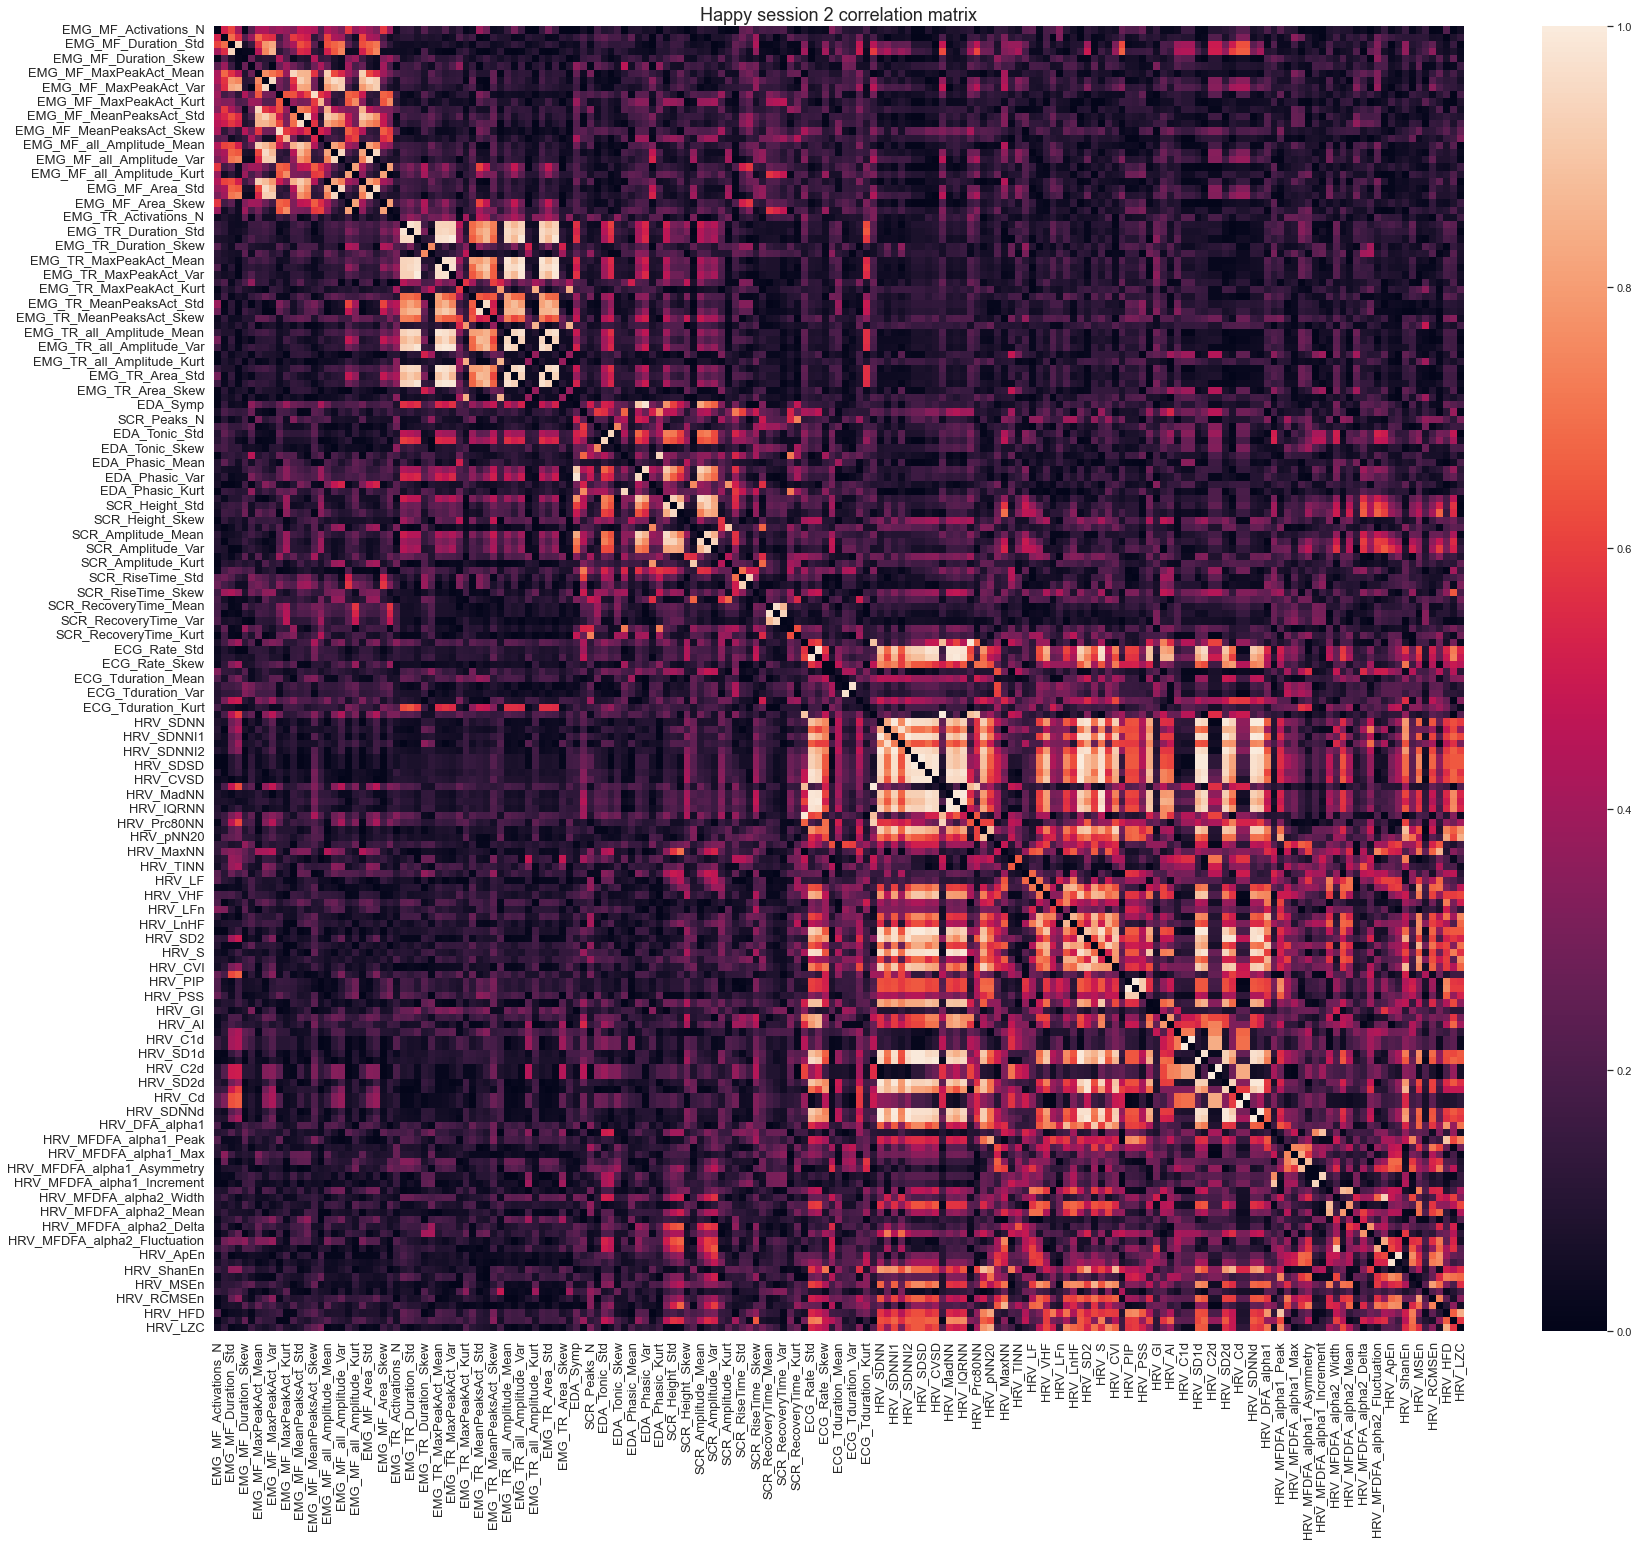

In [19]:
new_cor_b_S1 = cor_b_S1.replace(1,0)
a = new_cor_b_S1.idxmax()
print(a)
print('\n',a[1])
#print(new_cor_b_S1)
print('\n',new_cor_b_S1.iloc[1]['EMG_MF_Activations_N'])

sns.set(rc={'figure.figsize':(28,24)})
b_S1=sns.heatmap(new_cor_b_S1)
b_S1.set_title('Happy session 1 correlation matrix',fontsize=18)
b_S1.tick_params(labelsize=13)
plt.show()


new_cor_b_S2 = cor_b_S2.replace(1,0)
a_S2 = new_cor_b_S2.idxmax()
print(a_S2)
print('\n',a_S2[1])
#print(new_cor_b_S1)
print('\n',new_cor_b_S2.iloc[1]['EMG_MF_Activations_N'])

sns.set(rc={'figure.figsize':(28,24)})
b_S2=sns.heatmap(new_cor_b_S2)
b_S2.set_title('Happy session 2 correlation matrix',fontsize=18)
b_S2.tick_params(labelsize=13)
plt.show()

In [20]:
def selecting_feat (data,new_cor,a,threshold):
    deleted_features_list = []
    
        # Between all combinations find the maximum value and save the feature of row and the feature of column
    corr_value=0
    for i in range(0,len(a)):
        correlation = new_cor.iloc[i][a[i]]
        #print(correlation)
        #if corr_value<correlation:
           # corr_value=correlation
           # print(corr_value)
        if correlation >= threshold:
            feat1=new_cor.columns[i] #row of dataframe
            feat2=a[i] #column
                #Para teste fiz o print de feat1 e feat2 para depois ver a média de correlaçoes de cada uma e confirmar que está correto o funcionamento da função
            #print(feat1) 
            #print(feat2)
                 # Acessing the excel with the p-values of ANOVA results and delete the feature with the biggest p-value
            if corr_mean_S1[feat1]>=corr_mean_S1[feat2]:
                deleted_feat=feat1
            else:
                deleted_feat=feat2
            if deleted_feat not in deleted_features_list:
                deleted_features_list.append(deleted_feat)
                
    
        # Calculate new correlation matrix
        #cor = abs(data.corr())
        #new_cor = cor.replace(1,0)
        #a = new_cor.idxmax()
    # Delete the column and row of the removed feature 
    for feat in deleted_features_list:
        print(feat)
        data = data.drop(columns=feat)   

    n_del=len(deleted_features_list)
    n_rem=len(new_cor.columns)
    return n_del, n_rem, data, deleted_features_list

n_del, n_rem, data, deleted_features_list = selecting_feat (happy_S1,new_cor_b_S1,a,0.50)

n_del_S2, n_rem_S2, data_S2, deleted_features_list_S2 = selecting_feat (happy_S2,new_cor_b_S2,a_S2,0.50)

EMG_MF_all_Amplitude_Skew
EMG_MF_Duration_Std
EMG_MF_Duration_Skew
EMG_MF_MeanPeaksAct_Mean
EMG_MF_all_Amplitude_Std
EMG_MF_all_Amplitude_Var
EMG_MF_MaxPeakAct_Skew
EMG_MF_MaxPeakAct_Kurt
EMG_MF_MeanPeaksAct_Std
EMG_MF_MaxPeakAct_Mean
EMG_MF_MeanPeaksAct_Skew
EMG_MF_Area_Std
EMG_MF_Area_Var
EMG_TR_Duration_Mean
EMG_TR_Duration_Std
EMG_TR_Duration_Var
EMG_TR_Duration_Skew
EMG_TR_MaxPeakAct_Mean
EMG_TR_MeanPeaksAct_Std
EMG_TR_MeanPeaksAct_Var
EMG_TR_MaxPeakAct_Skew
EMG_TR_MeanPeaksAct_Kurt
EMG_TR_all_Amplitude_Mean
EMG_TR_all_Amplitude_Std
EMG_TR_MaxPeakAct_Kurt
EMG_TR_Area_Mean
EMG_TR_Area_Std
EDA_Phasic_Var
SCR_RiseTime_Kurt
EDA_Tonic_Skew
EDA_Tonic_Std
HRV_MedianNN
EDA_Phasic_Mean
SCR_Height_Mean
EDA_Phasic_Skew
SCR_Amplitude_Mean
SCR_Amplitude_Std
SCR_Amplitude_Var
SCR_Height_Skew
SCR_Height_Kurt
SCR_Amplitude_Skew
SCR_RiseTime_Mean
SCR_RiseTime_Var
HRV_HFn
SCR_RecoveryTime_Std
EMG_MF_MaxPeakAct_Var
EDA_Symp
HRV_Prc20NN
HRV_S
ECG_Rate_Std
HRV_SDANN1
HRV_MinNN
ECG_Tduration_Std
ECG_Td

In [21]:
print(n_del)
print(deleted_features_list)
print(len(a))

print(n_del_S2)
print(deleted_features_list_S2)
print(len(a_S2))

98
['EMG_MF_all_Amplitude_Skew', 'EMG_MF_Duration_Std', 'EMG_MF_Duration_Skew', 'EMG_MF_MeanPeaksAct_Mean', 'EMG_MF_all_Amplitude_Std', 'EMG_MF_all_Amplitude_Var', 'EMG_MF_MaxPeakAct_Skew', 'EMG_MF_MaxPeakAct_Kurt', 'EMG_MF_MeanPeaksAct_Std', 'EMG_MF_MaxPeakAct_Mean', 'EMG_MF_MeanPeaksAct_Skew', 'EMG_MF_Area_Std', 'EMG_MF_Area_Var', 'EMG_TR_Duration_Mean', 'EMG_TR_Duration_Std', 'EMG_TR_Duration_Var', 'EMG_TR_Duration_Skew', 'EMG_TR_MaxPeakAct_Mean', 'EMG_TR_MeanPeaksAct_Std', 'EMG_TR_MeanPeaksAct_Var', 'EMG_TR_MaxPeakAct_Skew', 'EMG_TR_MeanPeaksAct_Kurt', 'EMG_TR_all_Amplitude_Mean', 'EMG_TR_all_Amplitude_Std', 'EMG_TR_MaxPeakAct_Kurt', 'EMG_TR_Area_Mean', 'EMG_TR_Area_Std', 'EDA_Phasic_Var', 'SCR_RiseTime_Kurt', 'EDA_Tonic_Skew', 'EDA_Tonic_Std', 'HRV_MedianNN', 'EDA_Phasic_Mean', 'SCR_Height_Mean', 'EDA_Phasic_Skew', 'SCR_Amplitude_Mean', 'SCR_Amplitude_Std', 'SCR_Amplitude_Var', 'SCR_Height_Skew', 'SCR_Height_Kurt', 'SCR_Amplitude_Skew', 'SCR_RiseTime_Mean', 'SCR_RiseTime_Var', 'HR

In [22]:
data.shape
print(data)
filepath_feat='Happy_features_S1.xlsx'
writer=pd.ExcelWriter(filepath_feat, engine='xlsxwriter')
data.to_excel(writer, sheet_name='Happy_S1', na_rep='nan')
writer.save()

data_S2.shape
print(data_S2)
filepath_feat='Happy_features_S2.xlsx'
writer=pd.ExcelWriter(filepath_feat, engine='xlsxwriter')
data_S2.to_excel(writer, sheet_name='Happy_S2', na_rep='nan')
writer.save()

    EMG_MF_Activations_N  EMG_MF_Duration_Mean  EMG_MF_Duration_Var  \
0                    427              0.088222             0.011576   
1                    351              0.123026             0.015529   
2                    372              0.092306             0.011140   
3                    487              0.077552             0.000801   
4                    619              0.084868             0.002137   
5                    216              0.105958             0.022290   
6                    227              0.141498             0.073580   
7                    200              0.303660             0.420095   
8                    279              0.112731             0.066695   
9                    445              0.145018             0.082075   
10                   185              0.196465             0.136685   
11                   170              0.153659             0.177753   
12                   183              0.120432             0.035538   
13    